## Import Necessary Packages

In [1]:
import pickle
import numpy as np
import xarray as xr
import proplot as pplt
%config InlineBackend.figure_format = 'retina'
pplt.rc.update({'font.size':12})
import warnings
warnings.filterwarnings('ignore')

## Import and Unpickle Eq. 3 Budget Terms Data

We unpickle the pickled files which store the previously-calculated budget terms (```totaltend```, ```lwterm```, ```swterm```, ```sefterm```, and ```fluxconv```) by case. Note Pickling is only used for **short-term storage**, so if the pickled files you previosuly created are no longer available, the code used to create the pickled files must be run again. More information on pickling can be found in the Python 3.10.7 documentation [here](https://docs.python.org/3/library/pickle.html).

In [2]:
### Define Basic Data
path  = '/ocean/projects/atm200007p/ajenney/rcemip-large/'
cases = ['nz_32','nz_64','nz_128']
terms = ['SW','LW','SEF','Flux convergence','Total tendency']

### Define a Function to Unpickle the Saved Case Arrays
def unpicklebycase(filename):
    filepath = path+'analysis/'+filename
    infile   = open(filepath,'rb')
    dataname = pickle.load(infile)
    infile.close()
    return dataname

### Unpickle Case Arrays
nz_32  = unpicklebycase('fmse_budget_vars_nz_32.pkl')
nz_64  = unpicklebycase('fmse_budget_vars_nz_64.pkl')
nz_128 = unpicklebycase('fmse_budget_vars_nz_128.pkl')
casedata = [nz_32,nz_64,nz_128]

## Plot Fig. 6: Eq. 3 Budget Terms Time Series by Case

(<matplotlib.legend.Legend at 0x154dc87d2130>,
 <matplotlib.legend.Legend at 0x154dc875c0a0>)

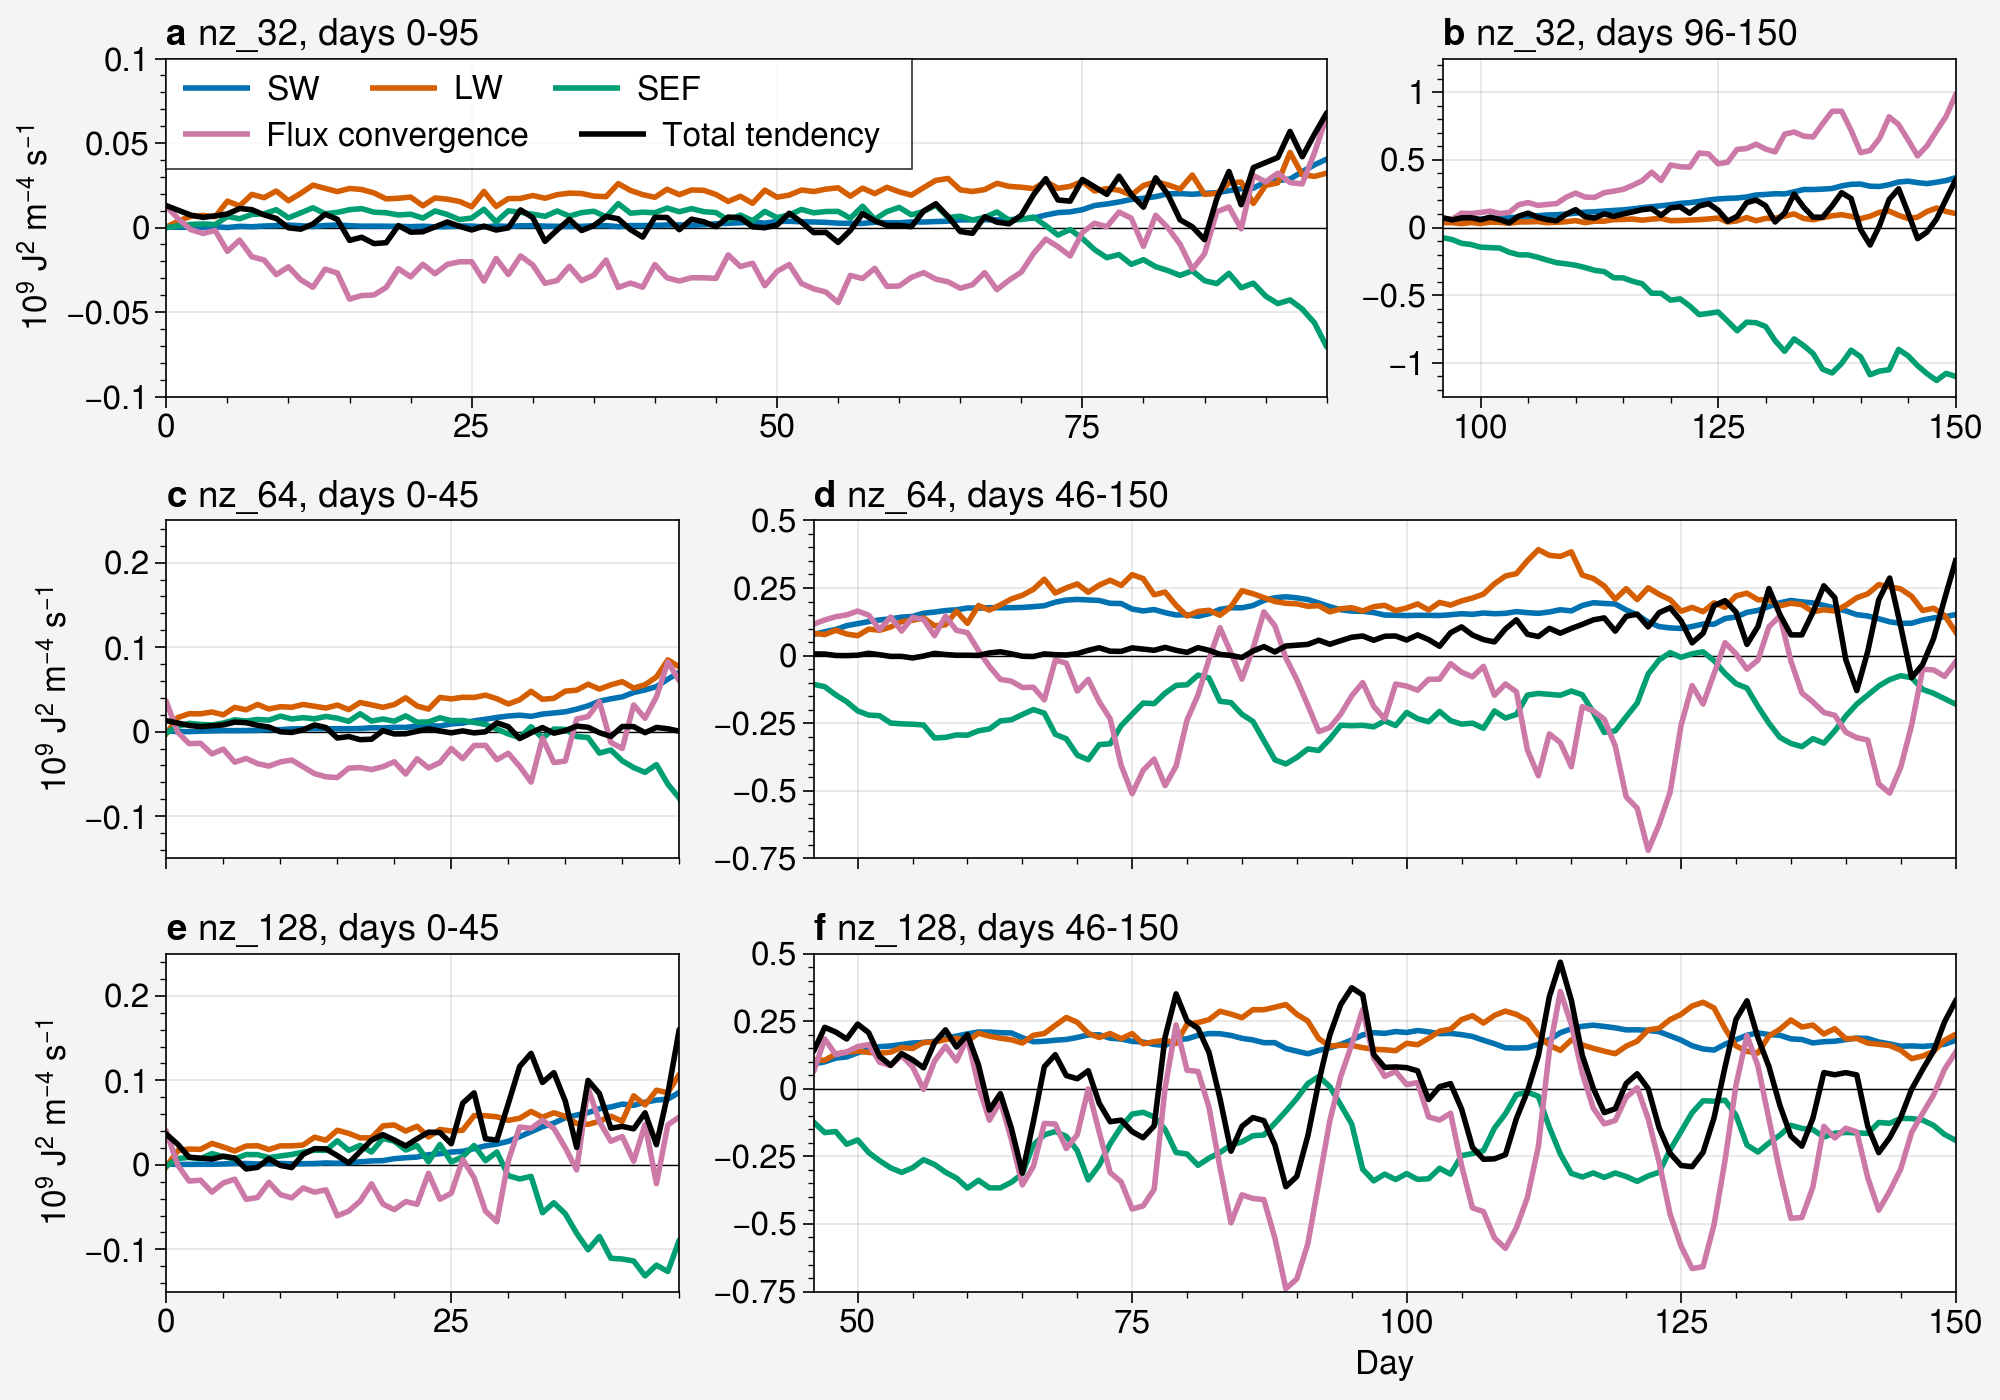

In [3]:
fig,axs = pplt.subplots([[1,1,2],[3,4,4],[5,6,6]],height=7,width=10,sharex=True,sharey=False)
cycle='colorblind'; linewidth=2
for i,ax in enumerate(axs):
    axs[i].format(xlabel='',ylabel='',xticks=25,abc='a',abcloc='l',titleloc='l')
    axs[i].axhline(0,linewidth=0.5,color='k')
axs[0].format(title='nz_32, days 0-95',xlim=(0,95),ylim=(-0.1,0.1),ylabel='10$^{9}$ J$^{2}$ m$^{-4}$ s$^{-1}$')
axs[1].format(title='nz_32, days 96-150',xlim=(96,150),ylim=(-1.25,1.25))
axs[2].format(title='nz_64, days 0-45',xlim=(0,45),ylim=(-0.15,0.25),ylabel='10$^{9}$ J$^{2}$ m$^{-4}$ s$^{-1}$')
axs[3].format(title='nz_64, days 46-150',xlim=(46,150),ylim=(-0.75,0.5))
axs[4].format(title='nz_128, days 0-45',xlim=(0,45),ylim=(-0.15,0.25),ylabel='10$^{9}$ J$^{2}$ m$^{-4}$ s$^{-1}$')
axs[5].format(title='nz_128, days 46-150',xlabel='Day',xlim=(46,150),ylim=(-0.75,0.5))  
axs[0:2].plot(nz_32.SW,linewidth=linewidth,cycle=cycle)
axs[0:2].plot(nz_32.LW,linewidth=linewidth,cycle=cycle)
axs[0:2].plot(nz_32.SEF,linewidth=linewidth,cycle=cycle)
axs[0:2].plot(nz_32.flux_conv,linewidth=linewidth,cycle=cycle)
axs[0:2].plot(nz_32.total_tend,linewidth=linewidth,color='k')
axs[2:4].plot(nz_64.SW,linewidth=linewidth,cycle=cycle)
axs[2:4].plot(nz_64.LW,linewidth=linewidth,cycle=cycle)
axs[2:4].plot(nz_64.SEF,linewidth=linewidth,cycle=cycle)
axs[2:4].plot(nz_64.flux_conv,linewidth=linewidth,cycle=cycle)
axs[2:4].plot(nz_32.total_tend,linewidth=linewidth,color='k')
axs[4:6].plot(nz_128.SW,linewidth=linewidth,cycle=cycle)
axs[4:6].plot(nz_128.LW,linewidth=linewidth,cycle=cycle)
axs[4:6].plot(nz_128.SEF,linewidth=linewidth,cycle=cycle)
axs[4:6].plot(nz_128.flux_conv,linewidth=linewidth,cycle=cycle)
axs[4:6].plot(nz_128.total_tend,linewidth=linewidth,color='k')
axs[0].legend(loc='ul',ncols=3,center=True,labels=terms)